<a href="https://colab.research.google.com/github/erdogant/bnlearn/blob/master/sprinkler_knowlegde_driven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bnlearn

     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 10.3 MB 24.0 MB/s 
     |████████████████████████████████| 118 kB 66.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=02404205562bf95ccb4d4c789567dd0adf59477fb1ad90bf46d017e912ef7f8d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import bnlearn as bn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[bnlearn] >Bayesian DAG created.
[bnlearn] >Plot based on BayesianModel


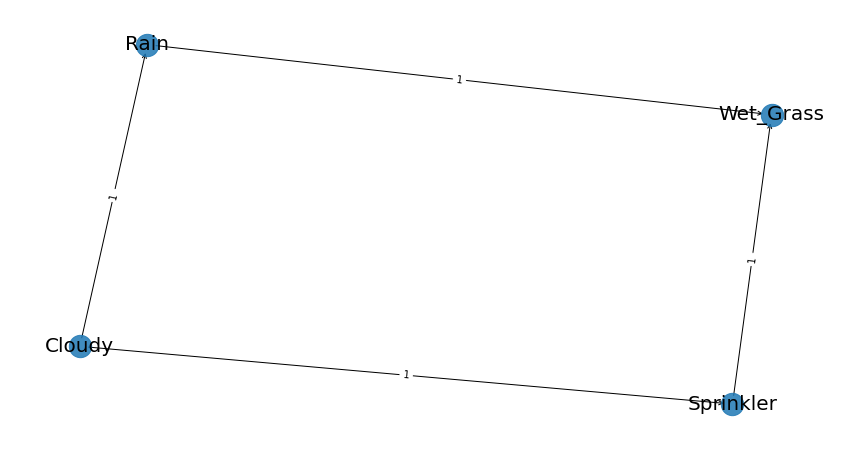

target,Cloudy,Sprinkler,Rain,Wet_Grass
source,,,,
Cloudy,False,True,True,False
Sprinkler,False,False,False,True
Rain,False,False,False,True
Wet_Grass,False,False,False,False


In [3]:
import bnlearn as bn

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]


# Create the DAG
DAG = bn.make_DAG(edges)

# Plot the DAG
bn.plot(DAG)

# DAG is stored in an adjacency matrix
DAG["adjmat"]


In [4]:
# Import the library
from pgmpy.factors.discrete import TabularCPD

# Cloudy
cpt_cloudy = TabularCPD(variable='Cloudy', variable_card=2, values=[[0.3], [0.7]])
print(cpt_cloudy)

+-----------+-----+
| Cloudy(0) | 0.3 |
+-----------+-----+
| Cloudy(1) | 0.7 |
+-----------+-----+


In [5]:
cpt_rain = TabularCPD(variable='Rain', variable_card=2,
                      values=[[0.8, 0.2],
                              [0.2, 0.8]],
                      evidence=['Cloudy'], evidence_card=[2])
print(cpt_rain)

+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+


In [6]:

cpt_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2,
                           values=[[0.5, 0.9],
                                   [0.5, 0.1]],
                           evidence=['Cloudy'], evidence_card=[2])
print(cpt_sprinkler)



+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+


In [7]:
cpt_wet_grass = TabularCPD(variable='Wet_Grass', variable_card=2,
                           values=[[1, 0.1, 0.1, 0.01],
                                   [0, 0.9, 0.9, 0.99]],
                           evidence=['Sprinkler', 'Rain'],
                           evidence_card=[2, 2])
print(cpt_wet_grass)

+--------------+--------------+--------------+--------------+--------------+
| Sprinkler    | Sprinkler(0) | Sprinkler(0) | Sprinkler(1) | Sprinkler(1) |
+--------------+--------------+--------------+--------------+--------------+
| Rain         | Rain(0)      | Rain(1)      | Rain(0)      | Rain(1)      |
+--------------+--------------+--------------+--------------+--------------+
| Wet_Grass(0) | 1.0          | 0.1          | 0.1          | 0.01         |
+--------------+--------------+--------------+--------------+--------------+
| Wet_Grass(1) | 0.0          | 0.9          | 0.9          | 0.99         |
+--------------+--------------+--------------+--------------+--------------+


In [8]:
# Update DAG with the CPTs
model = bn.make_DAG(DAG, CPD=[cpt_cloudy, cpt_sprinkler, cpt_rain, cpt_wet_grass])

# Print the CPTs
bn.print_CPD(model)

[bnlearn] >No changes made to existing Bayesian DAG.
[bnlearn] >Add CPD: Cloudy
[bnlearn] >Add CPD: Sprinkler
[bnlearn] >Add CPD: Rain
[bnlearn] >Add CPD: Wet_Grass
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
CPD of Cloudy:
+-----------+-----+
| Cloudy(0) | 0.3 |
+-----------+-----+
| Cloudy(1) | 0.7 |
+-----------+-----+
CPD of Sprinkler:
+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+
CPD of Rain:
+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+
CPD of Wet_Grass:
+--------------+--------------+--------------+---------

In [9]:
q1 = bn.inference.fit(model, variables=['Wet_Grass'], evidence={'Sprinkler':0})
print(q1.df)

Eliminating: Cloudy: 100%|██████████| 2/2 [00:00<00:00, 174.77it/s]

[bnlearn] >Variable Elimination..
+--------------+------------------+
| Wet_Grass    |   phi(Wet_Grass) |
+==============+==================+
| Wet_Grass(0) |           0.3838 |
+--------------+------------------+
| Wet_Grass(1) |           0.6162 |
+--------------+------------------+
   Wet_Grass         p
0          0  0.383846
1          1  0.616154


In [10]:
q2 = bn.inference.fit(model, variables=['Rain'], evidence={'Sprinkler':0, 'Cloudy':1})
print(q2.df)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[bnlearn] >Variable Elimination..
+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.2000 |
+---------+-------------+
| Rain(1) |      0.8000 |
+---------+-------------+
   Rain    p
0     0  0.2
1     1  0.8


In [11]:
q3 = bn.inference.fit(model, variables=['Wet_Grass','Rain'], evidence={'Sprinkler':1})
print(q3.df)

Eliminating: Cloudy: 100%|██████████| 1/1 [00:00<00:00, 166.31it/s]

[bnlearn] >Variable Elimination..
+---------+--------------+-----------------------+
| Rain    | Wet_Grass    |   phi(Rain,Wet_Grass) |
+=========+==============+=======================+
| Rain(0) | Wet_Grass(0) |                0.0609 |
+---------+--------------+-----------------------+
| Rain(0) | Wet_Grass(1) |                0.5482 |
+---------+--------------+-----------------------+
| Rain(1) | Wet_Grass(0) |                0.0039 |
+---------+--------------+-----------------------+
| Rain(1) | Wet_Grass(1) |                0.3870 |
+---------+--------------+-----------------------+
   Rain  Wet_Grass         p
0     0          0  0.060909
1     0          1  0.548182
2     1          0  0.003909
3     1          1  0.387000
